<div style="text-align: right"><strong>Capstone #2:</strong> <span style="color:darkred">Unit 1 Narrative Analytics and Experimentation </span> </div>

<a id="top"></a>

 ---------

# <span style="color:darkblue">Heart Disease Hospital Location Classification</span>

__Author:__ Ryan Harper 

----

<a href='#ov'>A. Overview</a><br>
<a href='#exp'>B. Experiment</a><br>
<a href='#sec1'>1. Cleaning Data</a><br>
<a href='#sec2'>2. Exploring the Data</a><br>
<a href='#sec3'>3. Statistical Significance</a><br>

-----

<div style="text-align: center"> <strong>Ex Visualization of Heart Disease Classification (1-4)</strong> </div>

![Image of Heart Disease Stages](http://www.heartfailure.org/wp-content/uploads/2015/03/www.HF-Stages1.jpg)

<div style="text-align: right">http://www.heartfailure.org/heart-failure/the-stages-of-heart-failure/index.html </div>

<a id="ov"></a>

# <span style="color:darkblue">Overview</span>  <a href='#top'>(top)</a>

__Data Source:__ http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

This data on health and heart disease was made available by UC Irvine's Machine Learning Repository (http://archive.ics.uci.edu/ml/index.php). It includes categorical variables (i.e. ~2-4 variations of a physical attribute) and continuous variables (blood pressure, cholesterol, and age). The aim of the research team was to use the 13 features (from __age__ to __thal__) to predict the existing heart disease diagnosis (__num__).

__Variables (health indicators):__
>__age:__ _age in years_<br>
__sex:__ _sex (1 = male; 0 = female)_ <br>
__cp:__ _chest pain type (1=typical) (1-4)_<br>
__trestbps:__ resting blood pressure (in mm Hg)<br>
__chol:__ serum cholesterol (in mg/dl)<br>
__fbs:__ fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)<br>
__restecg:__ resting electrocardiographic results (0 = normal) (0-2)<br>
__thalach:__ maximum heart rate achieved<br>
__exang:__ exercise induced angina (1 = yes; 0 = no)<br>
__oldpeak:__ st depression induced by exercise relative to rest<br>
__slope:__ the slope of the peak exercise ST segment (1: upslope, 2: flat, 3: downslope)<br>
__ca:__ number of major vessels (0-3)<br>
__thal:__ 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
__num:__ diagnosis of heart disease (angiographic disease status) (0: no presence, 1-4: increasing classification of heart disease severity)<br>

__Observations:__
>Switzerland had a high percentage of null data in certain categories. This suggests that different locations might also have different data collection tools/processes.<br><br>__chol__ in Virginia had a non-normal distibution but __chol__ in other locations appeared to be normally distributed.<br><br>
__thalach__ had similar parametric distributions per location but the respective mean per location was fairly different. This could indicate that patients in one location (i.e. Cleveland) results in a higher central tendency of __thalach__ than an area like Switzerland or Hungaria. <br><br>There is statistical significance between __oldpeak__ Cleveland, VA, and Hungarian samples. 

<a id="exp"></a>

# <span style="color:darkblue">Experiment</span> <a href='#top'>(top)</a>

__Hypothesis:__ 
> Patients can be classified by hospital location using 14 physical health measurements.

__Thoughts:__
>Data for this machine learning classification project was collected from four different hospitals (two in the US and two in Europe). My assumption is that diet, weather, and exercise habits vary between the populations of patients that attend each of the four hospitals. Patients from a community in Switzerland may have a very different min/max/mean range for the 14 health indicators than patients from Cleveland, USA. I predict that there is variation in the data samples' distributions by hospital location and that hospital location can be determined with the use of a data classification model. <br><br>There is total of 920 samples from Cleveland (303), Virginia (200), Swizterland (123), and Hungaria (294). Because of the large number of health indicators collected per sample for this project, I believe that it is possible that hospital location can be predicted based on the 14 health features in this data set.<br><br>There are a high number of dependent variables (physical health measurements) relative to the small number of samples and could result in overfitting.<br><br>Because of relatively low number of samples, this research project would be exploratory with the purpose of providing researchers new data to work with and new ways of considering sample location for patients and physical health measurements.

__Method:__
> I will use either __naive Bayes classifier__ or __KNN classifier__ to determine the hospital location from the 14 physical health measurements. For preprocessing, I will check each health feature to determine if the samples vary per location.

----------

<a id="sec1"></a>

# <span style="color:darkblue">Part 1: Cleaning Data</span> <a href='#top'>(top)</a>

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
from matplotlib.pyplot import subplots, show
import ast
import math
import re
from scipy.stats import ttest_ind, mannwhitneyu, median_test, f_oneway
import missingno as msno
from IPython.display import display
from IPython.core.debugger import Tracer

%matplotlib inline

In [2]:
# change optional settings for libraries
sns.set_style("whitegrid")
pd.set_option('show_dimensions', False)
np.warnings.filterwarnings('ignore')

In [3]:
filename = ['processed.cleveland.data','processed.hungarian.data','processed.switzerland.data','processed.va.data']
colnames=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [4]:
heartdisease = []

for path in filename:
    tempdf = pd.read_csv('../data/heart/' + path, names=colnames)
    tempname = re.findall(r'\.([a-z]*)\.',path)[0]
    # adds location of data to the dataframe
    tempdf['location'] = tempname
    heartdisease.append(tempdf)

heartdf = pd.concat(heartdisease)

In [5]:
heartdf['location'].loc[heartdf['num'] == 0].value_counts()

heartdf['location'] = pd.Categorical(heartdf['location'])

__Missing Data__

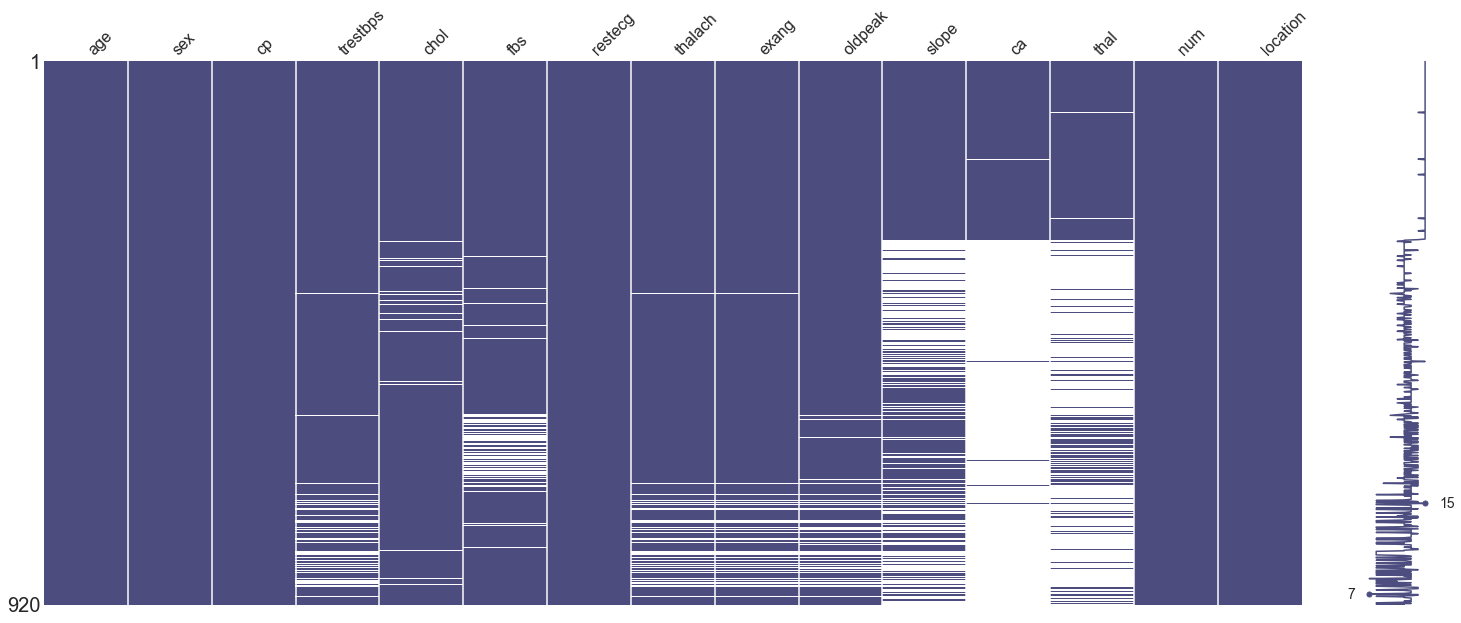

In [6]:
# check for missing data
heartdf = heartdf.replace('?',np.nan)

msno.matrix(heartdf,color=(.3, .3, .5))
plt.show()

_ __slope__, __ca__, and __thal__ appear to have a large number of missing values. __trestbps__, __thalach__, __exang__, and __oldpeak__ appear to have a smaller percentage of missing values for the entire row._

__Delete variables with large number of null values__

In [7]:
del heartdf['slope']
del heartdf['ca']
del heartdf['thal']

__Clean null value rows from dataframe and convert strings to floats__

In [8]:
print("Location Count Before DropNA:\n{}".format(heartdf['location'].value_counts()))

heart = heartdf.loc[heartdf['chol'] != 0].dropna()

for column in heart.columns:
    if column != 'location':
        heart[column] = pd.to_numeric(heart[column])
        
print("\nLocation Count After DropNA:\n{}".format(heart['location'].value_counts()))

heart = heart.loc[heart['trestbps'] != 0]
heart = heart.loc[heart['chol'] != 0]

Location Count Before DropNA:
cleveland      303
hungarian      294
va             200
switzerland    123
Name: location, dtype: int64

Location Count After DropNA:
cleveland      303
hungarian      261
va             130
switzerland      0
Name: location, dtype: int64


__Check again for Missing Data__

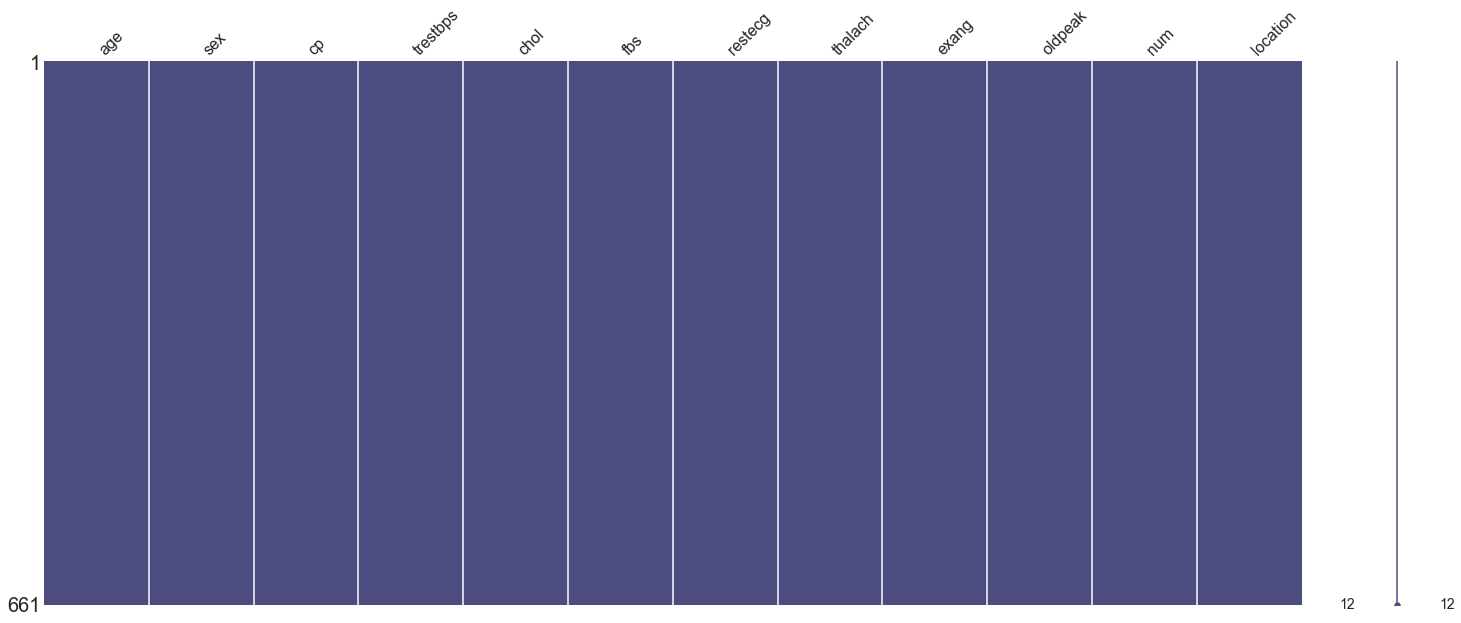

In [9]:
msno.matrix(heart,color=(.3, .3, .5))
plt.show()

_180 rows were lost from data cleaning, 3 variables were removed, and string object columns were converted to floats._

__Data Summary:__

In [10]:
# reporting of data
display(heart.head(3),heart.shape,heart.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 199
Data columns (total 12 columns):
age         661 non-null float64
sex         661 non-null float64
cp          661 non-null float64
trestbps    661 non-null float64
chol        661 non-null float64
fbs         661 non-null float64
restecg     661 non-null float64
thalach     661 non-null float64
exang       661 non-null float64
oldpeak     661 non-null float64
num         661 non-null int64
location    661 non-null category
dtypes: category(1), float64(10), int64(1)
memory usage: 62.8 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,location
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1,cleveland


(661, 12)

None

<a id="sec2"></a>

#  <span style="color:darkblue">Part 2: Exploring the Data</span> <a href='#top'>(top)</a>

__A. Scatterplot using univariate and bivariate methods__

_Before cleaning data_

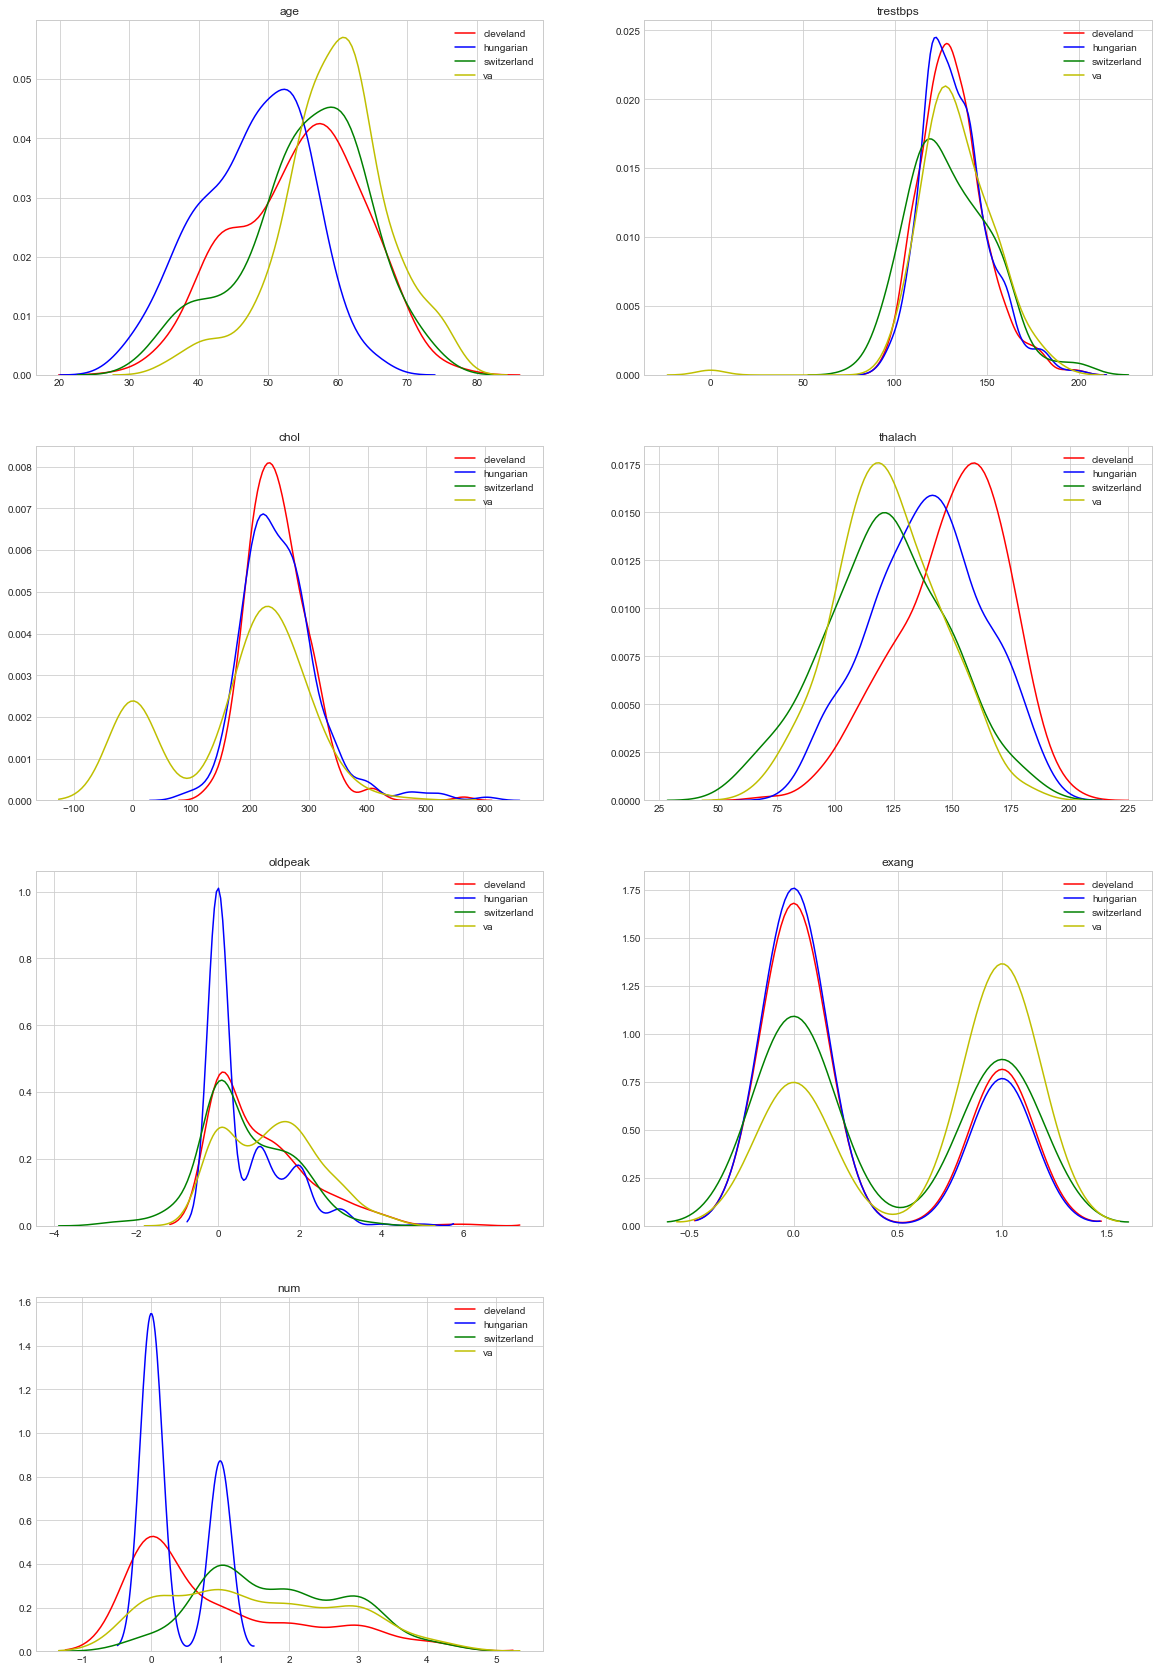

In [14]:
# Make the scatterplot matrix
featurelist = ['age','trestbps','chol','thalach','oldpeak','exang','num']
locations = ['cleveland', 'hungarian', 'switzerland', 'va']
palette = ['r','b','g','y']

i = 1
fig=plt.figure(figsize=(20,30))

for column in featurelist:
    plt.subplot(4, 2, i)
    i = i + 1
    for idx, location in enumerate(locations):
        sns.kdeplot(heartdf[column].loc[heartdf['location'] == location], color = palette[idx])
    plt.title(column)
    plt.legend(locations)

plt.savefig('heartdiseaseoutput.png')
plt.show()

_After cleaning data_

In [ ]:
# Make the scatterplot matrix
featurelist = ['age','trestbps','chol','thalach','oldpeak']


g = sns.PairGrid(data=heart, diag_sharey=False, hue="location", vars=featurelist, palette=['r','b','g','y'])
g.map_offdiag(plt.scatter, alpha=.5)
g.map_diag(sns.kdeplot, lw=3)

g.add_legend()

plt.show()

<a id="sec3"></a>

#  <span style="color:darkblue">Part 3: Statistical Significance <a href='#top'>(top)</a>

__A. Mood’s Median test (2+ Non-Normally Distributed Independent Samples)__

_ __Null Hypothesis:__ Assumes no statistically significant difference between samples._

In [ ]:
stat, p, med, tbl = median_test(heart['chol'].loc[heart['location'] == 'hungarian'],heart['chol'].loc[heart['location'] == 'va'],heart['chol'].loc[heart['location'] == 'cleveland'])
print(stat,med)
print(p)

p-value is not less than 5% and doesn't disprove the null hypothesis. There may not be statistical significance between Hungarian, VA, and Cleveland cholesterol samples.

In [ ]:
stat, p, med, tbl = median_test(heart['oldpeak'].loc[heart['location'] == 'hungarian'],heart['oldpeak'].loc[heart['location'] == 'va'],heart['oldpeak'].loc[heart['location'] == 'cleveland'])
print(stat,med)
print(p)

p-value is less than 5% and disproves the null hypothesis. The differences between Hungarian, VA, and Cleveland oldpeak samples are statistically significant.

__B. One-Way AnovaTest (2+ Normally Distributed Independent Samples)__

_ __Null Hypothesis:__ Assumes no statistically significant difference between samples._

In [ ]:
f, p = f_oneway(heart['chol'].loc[heart['location'] == 'hungarian'],heart['chol'].loc[heart['location'] == 'va'],heart['chol'].loc[heart['location'] == 'cleveland'])

print("F-Value: {}, p:{}".format(f,p))

p-value is not less than 5% and doesn't disprove the null hypothesis. There may not be statistical significance between Hungarian, VA, and Cleveland samples.

In [ ]:
f, p = f_oneway(heart['oldpeak'].loc[heart['location'] == 'hungarian'],heart['oldpeak'].loc[heart['location'] == 'va'],heart['oldpeak'].loc[heart['location'] == 'cleveland'])

print("F-Value: {}, p:{}".format(f,p))

p-value is less than 5% and disproves the null hypothesis. The differences between Hungarian, VA, and Cleveland oldpeak samples are statistically significant.

------------------

__NOTES__

Samples Comparison Test Chart: https://courses.thinkful.com/data-201v1/assignment/5.5.1

------